## *Importing Libraries & Data*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.shape

(541909, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data = data.dropna()
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.describe(include='O')

,InvoiceNo,StockCode,Description,Country
count,406829,406829,406829,406829
unique,22190,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2077,2070,361878


In [9]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [10]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## *Data Exploration*

In [11]:
data.Country.value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

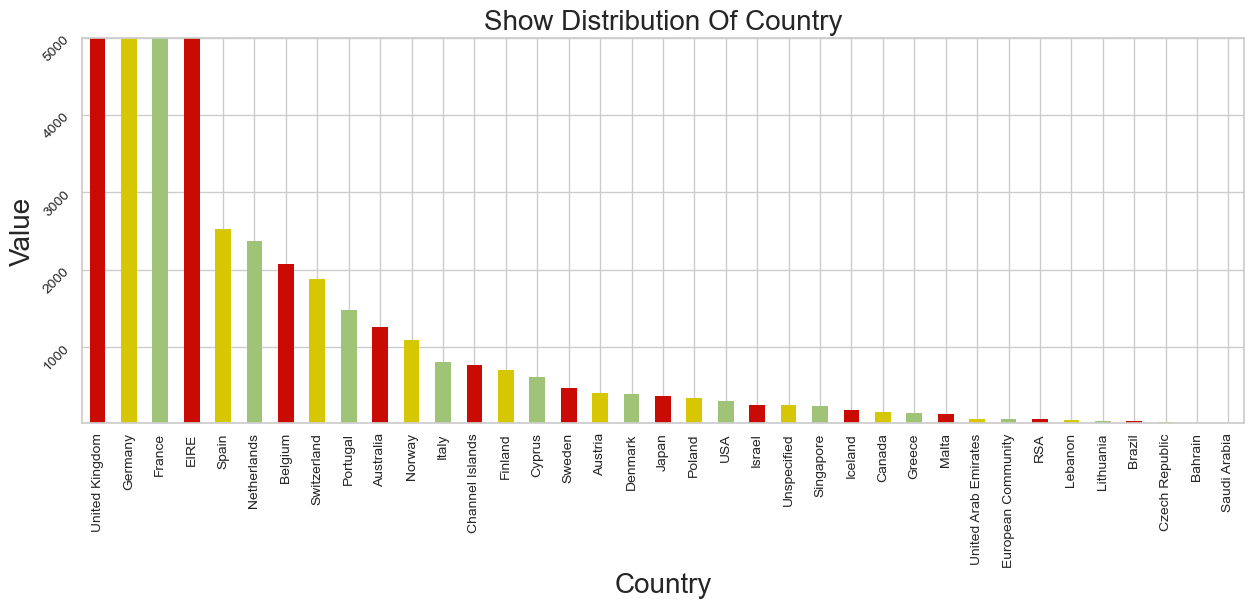

In [12]:
data.Country.value_counts().plot.bar(figsize=(15,5),color=['r','y','g'])
plt.title('Show Distribution Of Country',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.grid(True)
plt.yticks(rotation=45)
plt.ylim([10,5000])
plt.show()

In [13]:
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]
data.shape

(392692, 8)

In [14]:
# Calculate total spending for each customer
data['TotalSpending'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
#Create Feature For Customer
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalSpending': 'sum',
    'Quantity': 'sum',  
}).reset_index()
customer_data

,CustomerID,InvoiceNo,TotalSpending,Quantity
0,12346.0,1,77183.60,74215
1,12347.0,7,4310.00,2458
2,12348.0,4,1797.24,2341
3,12349.0,1,1757.55,631
4,12350.0,1,334.40,197
...,...,...,...,...
4333,18280.0,1,180.60,45
4334,18281.0,1,80.82,54
4335,18282.0,2,178.05,103
4336,18283.0,16,2045.53,1357


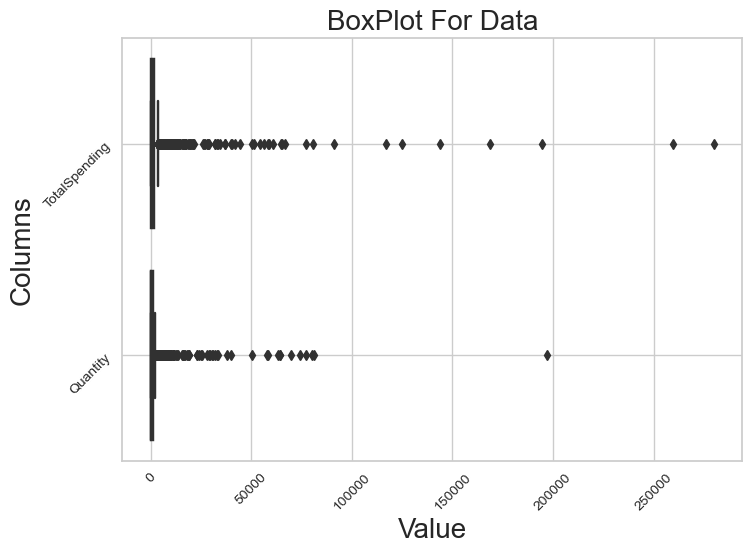

In [16]:
sns.boxplot(data=customer_data[['TotalSpending','Quantity']],orient='h')
plt.title('BoxPlot For Data',fontsize=20)
plt.xlabel('Value',fontsize=20)
plt.ylabel('Columns',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

In [17]:
for i in ['TotalSpending','Quantity']:
    q75,q25 = np.percentile(customer_data[i],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    customer_data[i][customer_data[i]>max]=max
    customer_data[i][customer_data[i]<min]=min

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_4608\3186006311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data[i][customer_data[i]>max]=max
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_4608\3186006311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data[i][customer_data[i]<min]=min


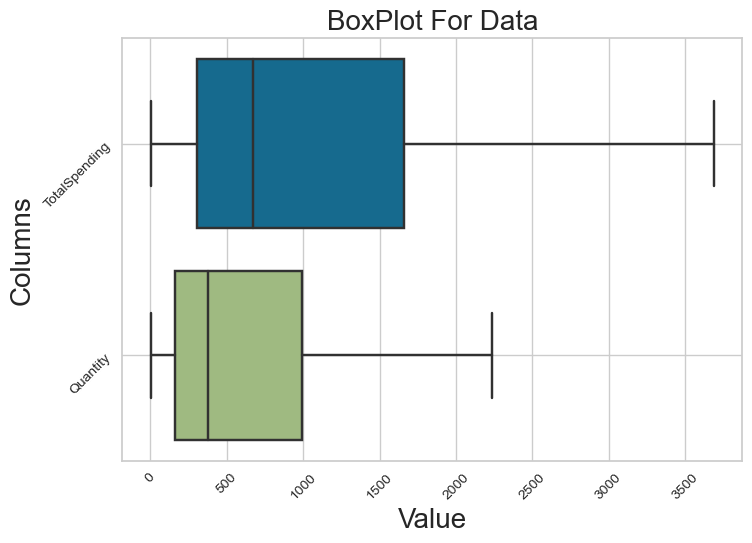

In [18]:
sns.boxplot(data=customer_data[['TotalSpending','Quantity']],orient='h')
plt.title('BoxPlot For Data',fontsize=20)
plt.xlabel('Value',fontsize=20)
plt.ylabel('Columns',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

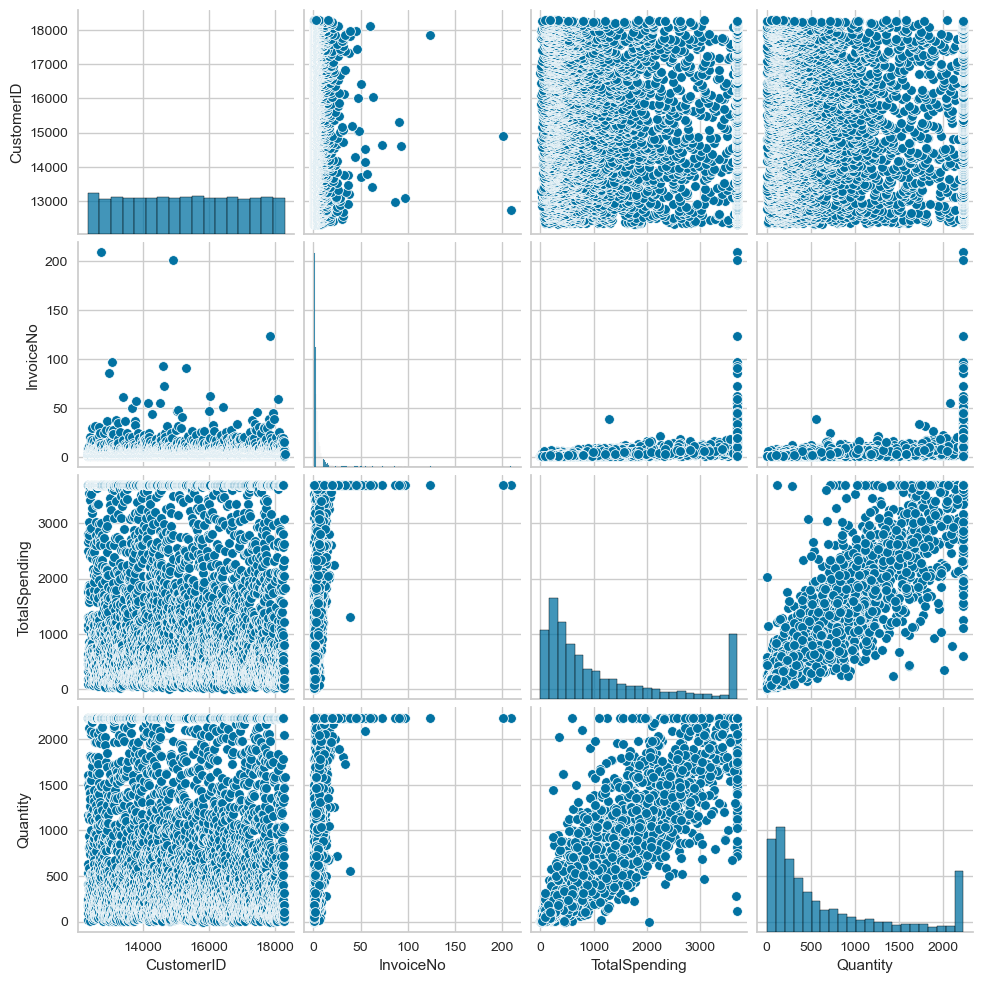

In [19]:
sns.pairplot(data=customer_data)
plt.show()

## *Model Bulding*

**Frist**

In [20]:
X=customer_data.iloc[:,1:]
key=X.columns
X.head()

,InvoiceNo,TotalSpending,Quantity
0,1,3691.77,2235.875
1,7,3691.77,2235.875
2,4,1797.24,2235.875
3,1,1757.55,631.000
4,1,334.40,197.000


In [21]:
min_max=MinMaxScaler()
X_scal=min_max.fit_transform(X)
X_scal=pd.DataFrame(X_scal,columns=key)
X_scal.head()

,InvoiceNo,TotalSpending,Quantity
0,0.000000,1.000000,1.000000
1,0.028846,1.000000,1.000000
2,0.014423,0.486302,1.000000
3,0.000000,0.475540,0.281895
4,0.000000,0.089655,0.087701


In [22]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X_scal)
X_new

array([[ 0.97541707, -0.00615901],
       [ 0.97676529, -0.00531847],
       [ 0.6138527 , -0.36893297],
       ...,
       [-0.37140701, -0.00527732],
       [ 0.38579184, -0.04178141],
       [ 0.41554878, -0.15592784]])

In [23]:
X_train, X_test= train_test_split(X_new,test_size=0.05, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (4121, 2)
X_test shape is  (217, 2)


KMeans

In [24]:
wcss = []
n=20
for i in range(1,n):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=44)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
wcss

[792.9416441214863,
 182.89903436843414,
 90.77053434330092,
 60.693351833875056,
 47.727848879813166,
 39.843610306544385,
 33.72498425632262,
 30.085072719225657,
 26.70978338830124,
 24.405183664405943,
 22.172113349310408,
 20.16022764215679,
 18.46995738183792,
 17.05308640994747,
 15.906687582186615,
 14.90509944057037,
 13.998663640812062,
 13.236353435143819,
 12.608868395539861]

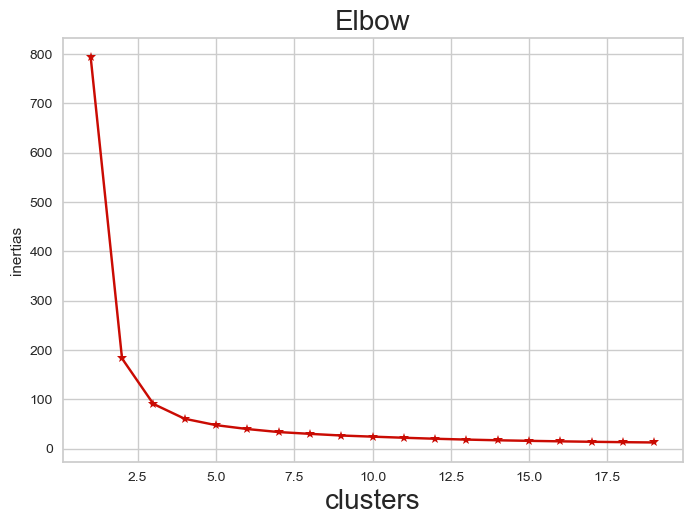

In [25]:
plt.plot(range(1,n),wcss,marker='*',c='r')
plt.title('Elbow',fontsize=20)
plt.xlabel('clusters',fontsize=20)
plt.ylabel('inertias')
plt.show()

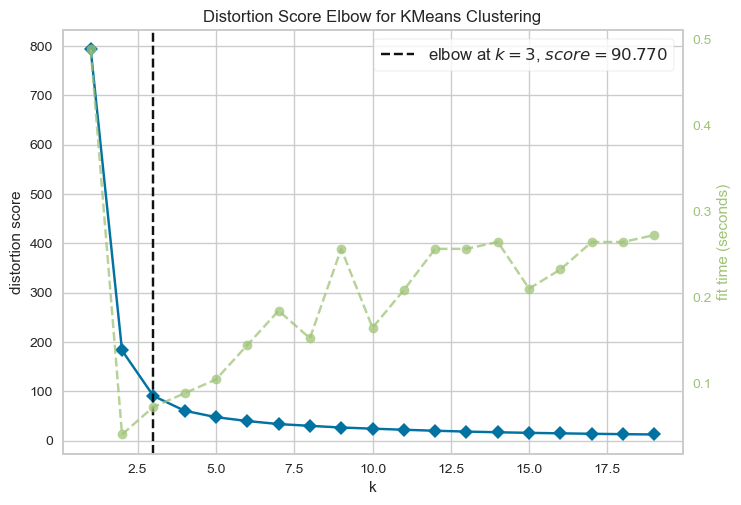

In [26]:
#another way to show number of cluster
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [27]:
#Number Of Cluster 3
KMeansModel = KMeans(n_clusters=3,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[ 1.60345419e-01 -2.51400368e-03]
 [-2.83654105e-01  5.04690938e-04]
 [ 8.45555056e-01  2.86069819e-03]]
KMeansModel labels are :  [1 1 2 ... 1 1 1]
KMeansModel intertia is :  90.77053434330092
KMeansModel No. of iteration is :  8


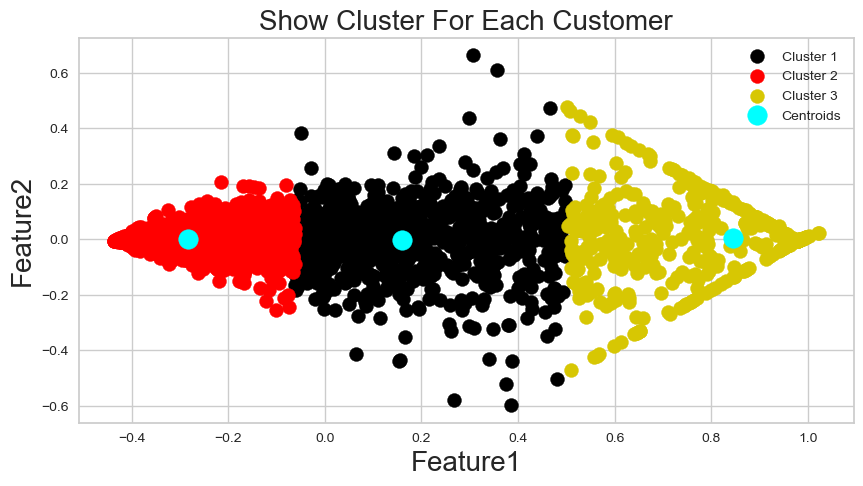

In [28]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(10,5))
plt.scatter(X_train[y==0,0], X_train[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_train[y==1,0], X_train[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train[y==2,0], X_train[y==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

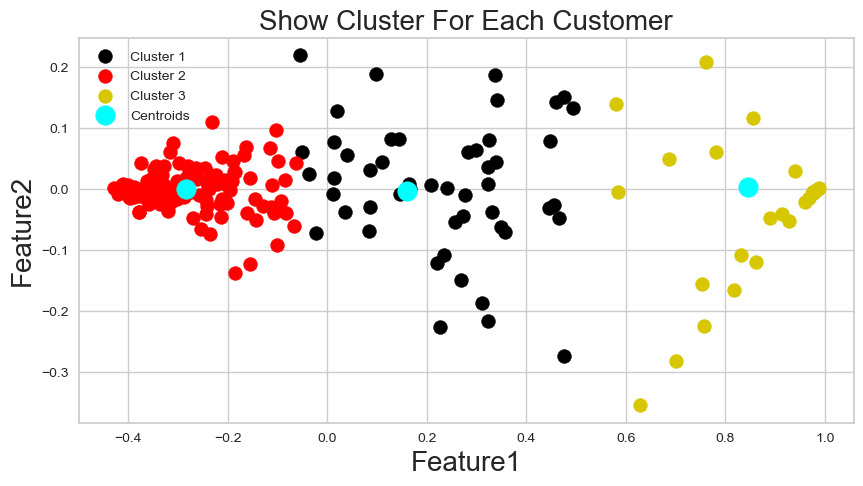

In [29]:
# plotting all the clusters and their Centroids
y_pred=KMeansModel.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test[y_pred==0,0], X_test[y_pred==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_test[y_pred==1,0], X_test[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test[y_pred==2,0], X_test[y_pred==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

In [30]:
silhouette_avg = silhouette_score(X_train, y)
print(f'Silhouette Score train: {silhouette_avg}')
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score test: {silhouette_avg}')

Silhouette Score train: 0.6252405709156471
Silhouette Score test: 0.6729510214722499


AgglomerativeClustering

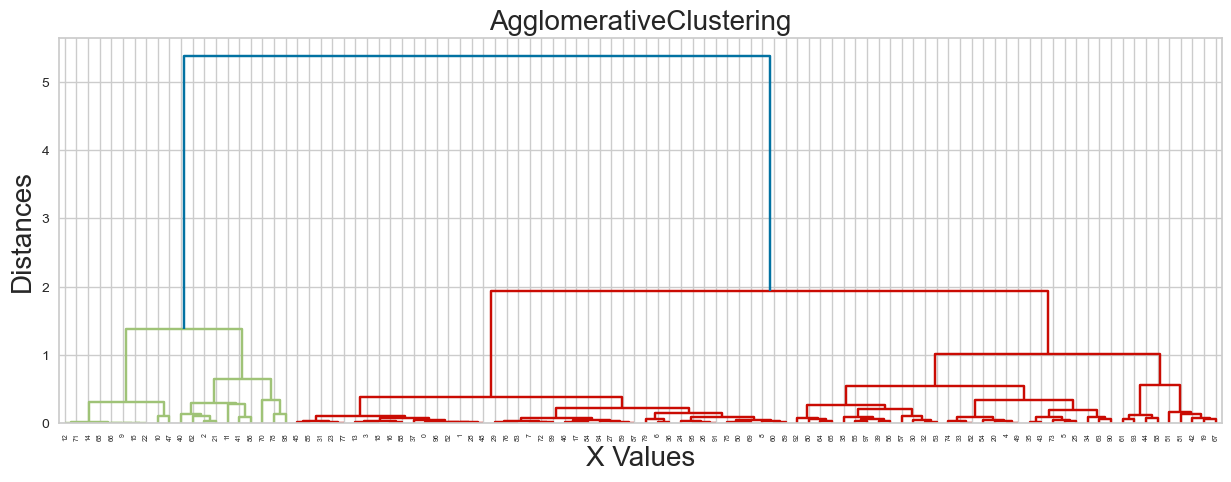

In [31]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X_train[:100,:], method = 'ward'))
plt.title('AgglomerativeClustering',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [32]:
#number of cluster 3 
AggClusteringModel = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y = AggClusteringModel.fit_predict(X_train)
y_pred = AggClusteringModel.fit_predict(X_test)

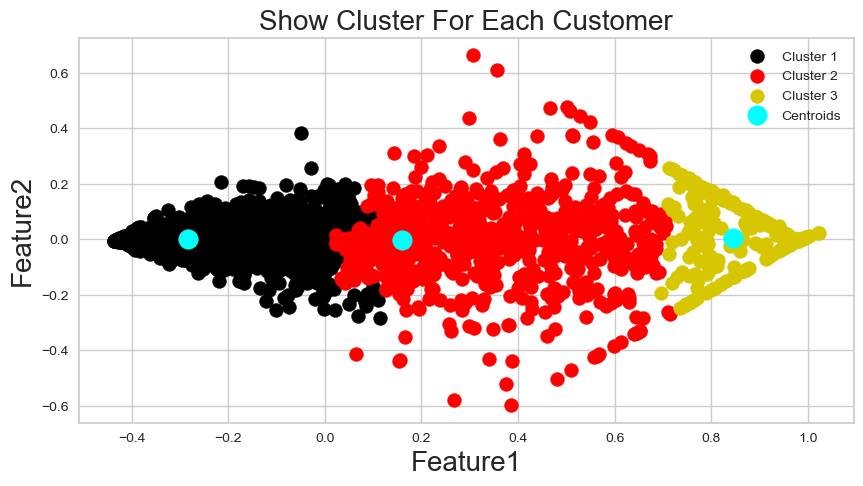

In [33]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(10,5))
plt.scatter(X_train[y==0,0], X_train[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_train[y==1,0], X_train[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train[y==2,0], X_train[y==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

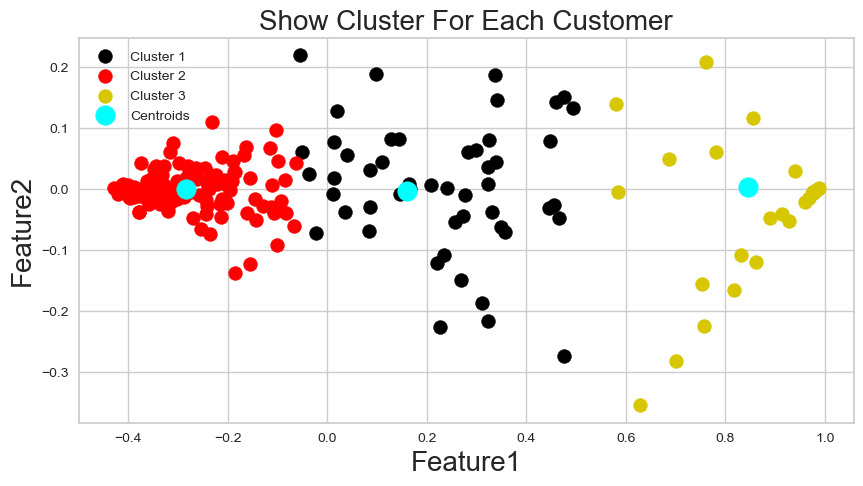

In [34]:
# plotting all the clusters and their Centroids
y_pred=KMeansModel.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test[y_pred==0,0], X_test[y_pred==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_test[y_pred==1,0], X_test[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test[y_pred==2,0], X_test[y_pred==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

In [35]:
silhouette_avg = silhouette_score(X_train, y)
print(f'Silhouette Score train: {silhouette_avg}')
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score test: {silhouette_avg}')

Silhouette Score train: 0.6478090735057188
Silhouette Score test: 0.6729510214722499


**Second**

In [36]:
key=X.iloc[:,1:].columns
X_2=min_max.fit_transform(X.iloc[:,1:])
X_2=pd.DataFrame(X_2,columns=key)
X_2.head()

,TotalSpending,Quantity
0,1.000000,1.000000
1,1.000000,1.000000
2,0.486302,1.000000
3,0.475540,0.281895
4,0.089655,0.087701


In [37]:
X_train, X_test= train_test_split(X_2,test_size=0.05, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (4121, 2)
X_test shape is  (217, 2)


KMeans

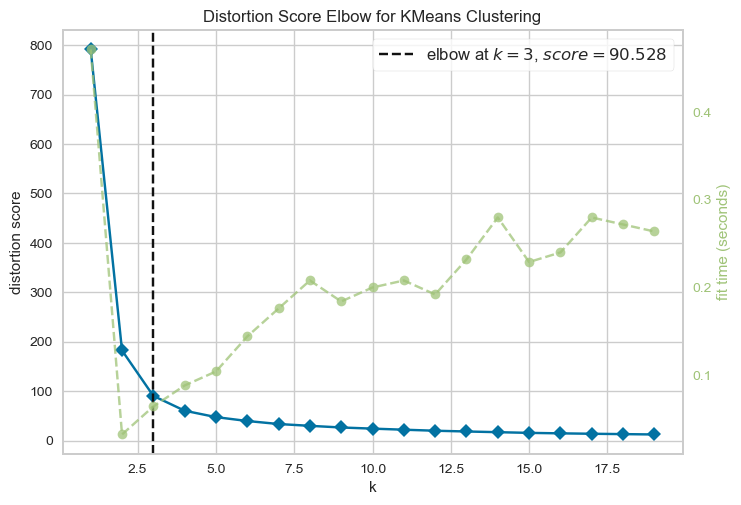

In [38]:
#another way to show number of cluster
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [39]:
#Number Of Cluster 3
KMeansModel = KMeans(n_clusters=3,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[0.42674185 0.42127525]
 [0.91157628 0.90224461]
 [0.11388923 0.10405705]]
KMeansModel labels are :  [2 2 1 ... 2 2 2]
KMeansModel intertia is :  90.52801643879874
KMeansModel No. of iteration is :  3


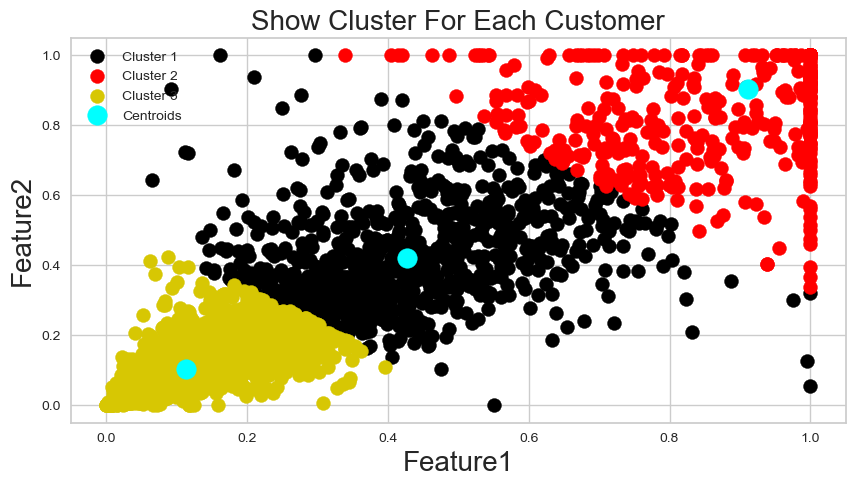

In [40]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(10,5))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

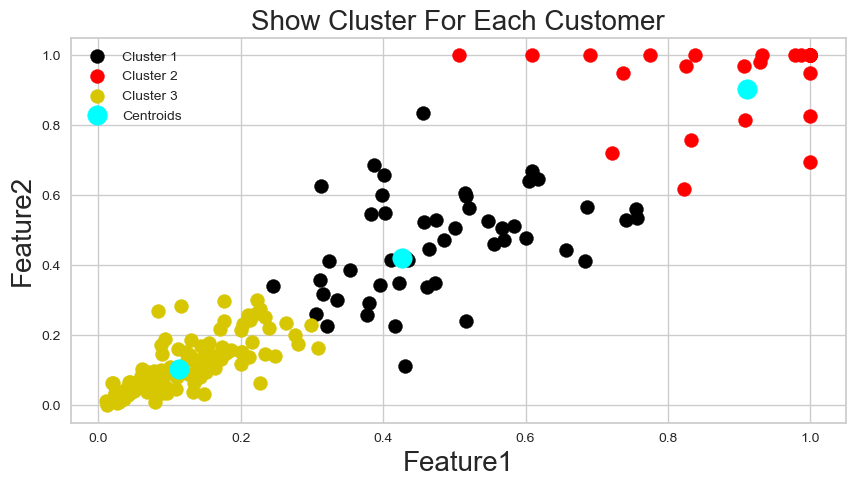

In [41]:
# plotting all the clusters and their Centroids
y_pred=KMeansModel.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

In [42]:
silhouette_avg = silhouette_score(X_train, y)
print(f'Silhouette Score train: {silhouette_avg}')
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score test: {silhouette_avg}')

Silhouette Score train: 0.625974504780473
Silhouette Score test: 0.6732390129558734


AgglomerativeClustering

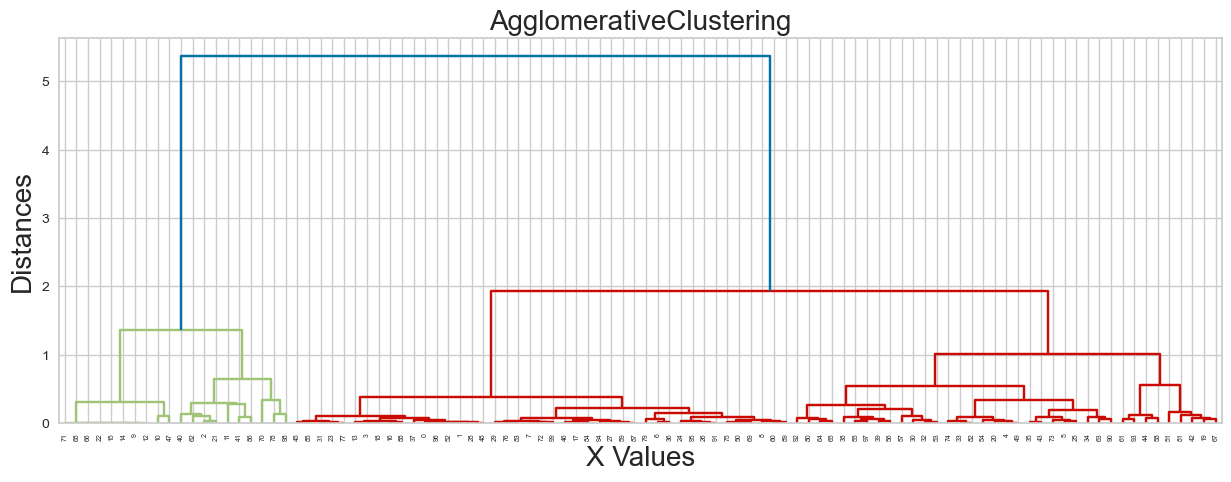

In [43]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X_train.iloc[:100,:], method = 'ward'))
plt.title('AgglomerativeClustering',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [44]:
#number of cluster 3 
AggClusteringModel = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y = AggClusteringModel.fit_predict(X_train)
y_pred = AggClusteringModel.fit_predict(X_test)

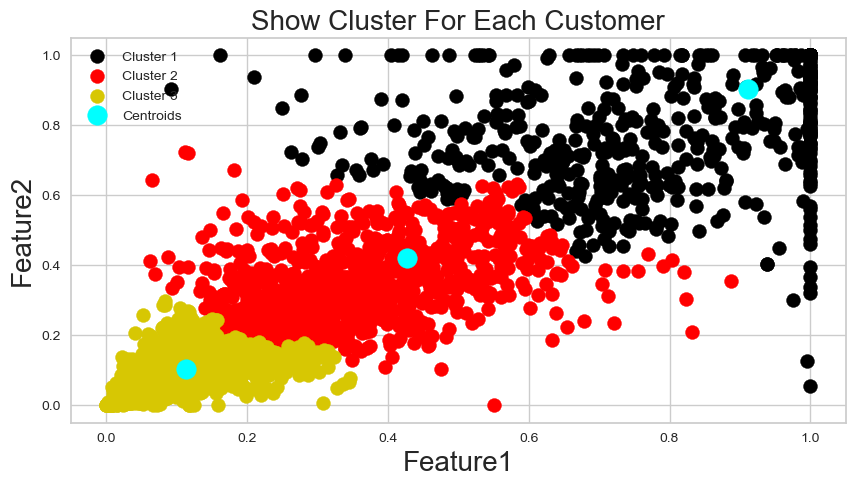

In [45]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(10,5))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

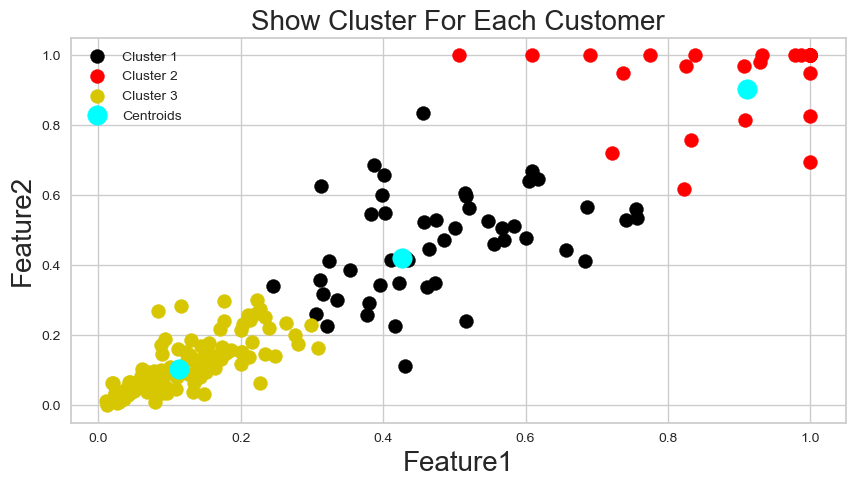

In [46]:
# plotting all the clusters and their Centroids
y_pred=KMeansModel.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

In [47]:
silhouette_avg = silhouette_score(X_train, y)
print(f'Silhouette Score train: {silhouette_avg}')
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score test: {silhouette_avg}')

Silhouette Score train: 0.5736469965300908
Silhouette Score test: 0.6732390129558734
